# Analise de Resultados

## Setup

In [1]:
!pip install -U xgboost==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.1.0
    Uninstalling xgboost-3.1.0:
      Successfully uninstalled xgboost-3.1.0


In [2]:
pip install -U scikit-learn==1.4.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 133.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.


In [3]:
# Etapa 1: Configurar a API do Kaggle
# 1. Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Analise dos Rounds

### 1. Analise do round_01
Objetivo: centralizar e comparar os resultados registrados no results.csv.

- Ler results.csv como tabela de experimentos.
- Mostrar resumo ordenado por métrica principal (ex: f1_score ou auc_roc).
- Mostrar evolução de performance por round (gráfico de linha).
- Exibir hiperparâmetros-chave ao lado das métricas.

👉 Isso dá uma visão de “dashboard histórico” de experimentos.

#### Confusion Matrix

- Lê o arquivo classification_report_*.txt gerado pelo pipeline;
- Extrai a matriz de confusão automaticamente (a partir do texto);
- Plota o heatmap visual da matriz de confusão;
- Calcula sensibilidade (recall), especificidade, e balanced accuracy;
- Gera um resumo textual no formato ideal para o NotebookLM.

📂 Lendo classification report: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/classification_report_20251023_205119.txt

📊 Matriz de Confusão:
[[ 26   7]
 [  3 128]]


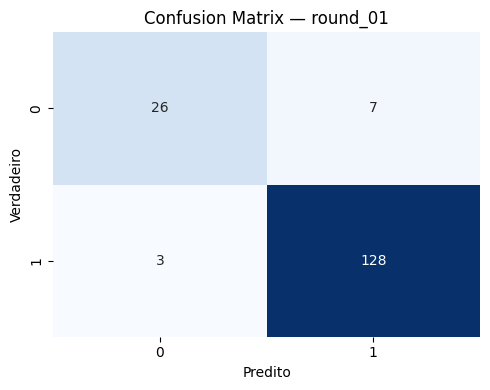


📈 Métricas Derivadas da Matriz de Confusão:
Sensibilidade (Recall): 0.977
Especificidade: 0.788
Balanced Accuracy: 0.882

💾 Resumo salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/confusion_matrix_summary.txt


In [ ]:
# =========================================================
# 🔹 ANÁLISE DO ROUND — CONFUSION MATRIX E MÉTRICAS DERIVADAS
# =========================================================
# Objetivo:
#  - Carregar a matriz de confusão salva no classification_report_*.txt
#  - Plotar visualmente a matriz
#  - Calcular Sensibilidade (Recall), Especificidade e Balanced Accuracy
# =========================================================

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, confusion_matrix

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES INICIAIS
# ---------------------------------------------------------
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
round_id = "round_01"

round_path = os.path.join(drive_path, "models/xgboost/rounds", round_id)
report_files = [f for f in os.listdir(round_path) if f.startswith("classification_report_") and f.endswith(".txt")]

assert len(report_files) > 0, f"❌ Nenhum arquivo classification_report_*.txt encontrado em {round_path}"

report_path = os.path.join(round_path, report_files[-1])  # pega o mais recente
print(f"📂 Lendo classification report: {report_path}")

# ---------------------------------------------------------
# 2️⃣ LEITURA E EXTRAÇÃO DA MATRIZ DE CONFUSÃO
# ---------------------------------------------------------
with open(report_path, "r") as f:
    content = f.read()

# Extrai a matriz de confusão do texto
pattern = r"\[\[([\d\s]+)\]\s*\[([\d\s]+)\]\]"
match = re.search(pattern, content)

if not match:
    raise ValueError("❌ Matriz de confusão não encontrada no arquivo de texto!")

row1 = [int(x) for x in match.group(1).split()]
row2 = [int(x) for x in match.group(2).split()]
cm = np.array([row1, row2])

print("\n📊 Matriz de Confusão:")
print(cm)

# ---------------------------------------------------------
# 3️⃣ PLOTAR MATRIZ DE CONFUSÃO
# ---------------------------------------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — {round_id}")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4️⃣ CÁLCULO DAS MÉTRICAS DERIVADAS
# ---------------------------------------------------------
# Estrutura da matriz: [[TN, FP], [FN, TP]]
tn, fp, fn, tp = cm.ravel()

# Sensibilidade / Recall
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan

# Especificidade
specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

# Balanced Accuracy
balanced_acc = (sensitivity + specificity) / 2

# ---------------------------------------------------------
# 5️⃣ RESULTADOS
# ---------------------------------------------------------
print("\n📈 Métricas Derivadas da Matriz de Confusão:")
print(f"Sensibilidade (Recall): {sensitivity:.3f}")
print(f"Especificidade: {specificity:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")

# ---------------------------------------------------------
# 6️⃣ SALVAR RESUMO EM .TXT
# ---------------------------------------------------------
summary_path = os.path.join(round_path, f"confusion_matrix_summary.txt")
with open(summary_path, "w") as f:
    f.write("=== CONFUSION MATRIX ===\n")
    f.write(str(cm) + "\n\n")
    f.write("=== MÉTRICAS DERIVADAS ===\n")
    f.write(f"Sensibilidade (Recall): {sensitivity:.4f}\n")
    f.write(f"Especificidade: {specificity:.4f}\n")
    f.write(f"Balanced Accuracy: {balanced_acc:.4f}\n")

print(f"\n💾 Resumo salvo em: {summary_path}")


#### Curvas de treinamento (por época)

✅ Insights esperados:

- Se val_logloss estabiliza enquanto train_logloss continua caindo → overfitting.
- Se ambos caem e convergem → bom aprendizado.
- Se val_logloss sobe → underfitting ou instabilidade de aprendizado.

📂 Lendo log de treino: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/train_log_20251023_205119.txt
✅ 108 épocas carregadas


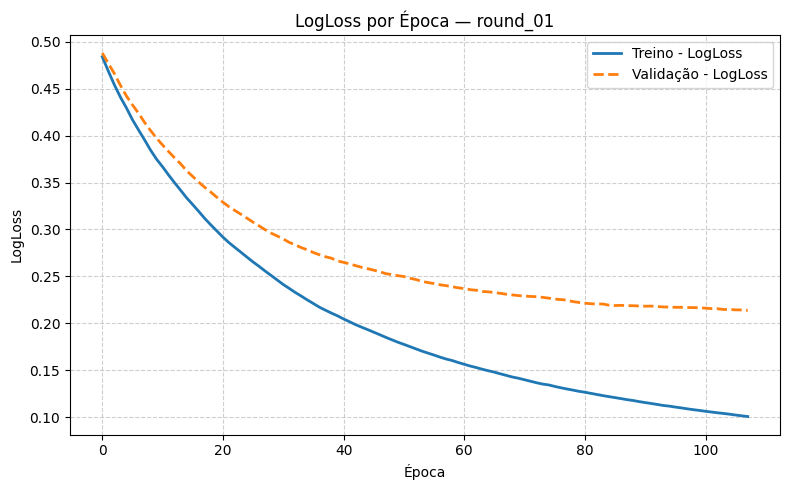

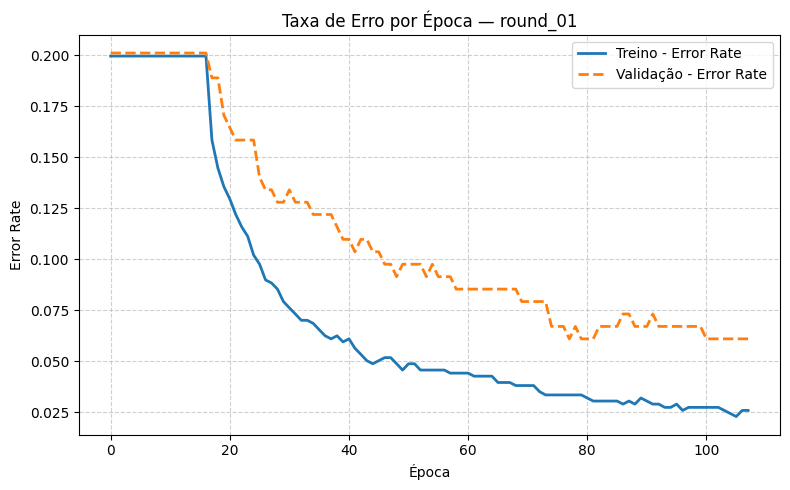


📈 Diagnóstico automático:
⚪ Comportamento estável ou inconclusivo.

🔹 LogLoss final — Treino: 0.1006 | Validação: 0.2137
🔹 Gap Treino-Validação: 0.1131
🔹 Tendência da Validação (últimas 10 épocas): -0.0003

💾 Resumo salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/training_curves_summary.txt


In [ ]:
# =========================================================
# 🔹 ANÁLISE DO ROUND — CURVAS DE TREINAMENTO (LOGLOSS & ERROR)
# =========================================================
# Objetivo:
#  - Carregar o arquivo train_log_*.txt
#  - Plotar LogLoss e Error Rate por época
#  - Detectar padrões de aprendizado (overfitting, underfitting, bom treino)
# =========================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES INICIAIS
# ---------------------------------------------------------
# drive_path = "/content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness"
# round_id = "round_01"

round_path = os.path.join(drive_path, "models/xgboost/rounds", round_id)
log_files = [f for f in os.listdir(round_path) if f.startswith("train_log_") and f.endswith(".txt")]

assert len(log_files) > 0, f"❌ Nenhum arquivo train_log_*.txt encontrado em {round_path}"

log_path = os.path.join(round_path, log_files[-1])  # pega o mais recente
print(f"📂 Lendo log de treino: {log_path}")

# ---------------------------------------------------------
# 2️⃣ CARREGAR LOG DE TREINAMENTO
# ---------------------------------------------------------
df_log = pd.read_csv(log_path, sep="\t")

assert all(col in df_log.columns for col in ["epoch", "train_logloss", "val_logloss", "train_error", "val_error"]), \
    "❌ Arquivo de log não contém as colunas esperadas!"

print(f"✅ {len(df_log)} épocas carregadas")

# ---------------------------------------------------------
# 3️⃣ PLOTAR CURVAS DE LOGLOSS
# ---------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(df_log["epoch"], df_log["train_logloss"], label="Treino - LogLoss", linewidth=2)
plt.plot(df_log["epoch"], df_log["val_logloss"], label="Validação - LogLoss", linewidth=2, linestyle="--")
plt.title(f"LogLoss por Época — {round_id}")
plt.xlabel("Época")
plt.ylabel("LogLoss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4️⃣ PLOTAR CURVAS DE ERROR RATE
# ---------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(df_log["epoch"], df_log["train_error"], label="Treino - Error Rate", linewidth=2)
plt.plot(df_log["epoch"], df_log["val_error"], label="Validação - Error Rate", linewidth=2, linestyle="--")
plt.title(f"Taxa de Erro por Época — {round_id}")
plt.xlabel("Época")
plt.ylabel("Error Rate")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5️⃣ ANÁLISE AUTOMÁTICA DE COMPORTAMENTO DO TREINO
# ---------------------------------------------------------
train_logloss_final = df_log["train_logloss"].iloc[-1]
val_logloss_final = df_log["val_logloss"].iloc[-1]

# Diferença entre treino e validação (última época)
logloss_gap = abs(val_logloss_final - train_logloss_final)

# Verifica se a curva de validação está subindo no final
val_slope = np.mean(np.diff(df_log["val_logloss"].tail(10)))

# Critérios simples de diagnóstico
if logloss_gap > 0.05 and val_slope > 0:
    diagnosis = "🔴 Overfitting detectado: o LogLoss de validação sobe enquanto o de treino continua caindo."
elif logloss_gap < 0.05 and val_slope < 0:
    diagnosis = "🟢 Bom aprendizado: LogLoss de treino e validação caem e convergem."
elif val_slope > 0 and train_logloss_final > val_logloss_final:
    diagnosis = "🟡 Underfitting ou instabilidade: o modelo não está aprendendo adequadamente."
else:
    diagnosis = "⚪ Comportamento estável ou inconclusivo."

# ---------------------------------------------------------
# 6️⃣ MOSTRAR E SALVAR RESULTADO
# ---------------------------------------------------------
print("\n📈 Diagnóstico automático:")
print(diagnosis)
print(f"\n🔹 LogLoss final — Treino: {train_logloss_final:.4f} | Validação: {val_logloss_final:.4f}")
print(f"🔹 Gap Treino-Validação: {logloss_gap:.4f}")
print(f"🔹 Tendência da Validação (últimas 10 épocas): {val_slope:.4f}")

summary_path = os.path.join(round_path, "training_curves_summary.txt")
with open(summary_path, "w") as f:
    f.write("=== TRAINING CURVES SUMMARY ===\n")
    f.write(f"Round: {round_id}\n")
    f.write(f"Épocas: {len(df_log)}\n\n")
    f.write(f"LogLoss Final — Treino: {train_logloss_final:.4f}\n")
    f.write(f"LogLoss Final — Validação: {val_logloss_final:.4f}\n")
    f.write(f"Gap Treino-Validação: {logloss_gap:.4f}\n")
    f.write(f"Tendência Final Validação: {val_slope:.4f}\n\n")
    f.write("Diagnóstico:\n")
    f.write(diagnosis + "\n")

print(f"\n💾 Resumo salvo em: {summary_path}")


#### Análise de Overfitting (automática)

- Calcular diferença percentual entre treino e validação:


In [ ]:
# =========================================================
# 🔹 ANÁLISE DO ROUND — OVERFITTING AUTOMÁTICO (TSV)
# =========================================================
import os
import pandas as pd

# Caminhos
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
round_id = "round_01"
results_path = os.path.join(drive_path, "results", "results.txt")

assert os.path.exists(results_path), f"❌ Arquivo results.txt não encontrado em {results_path}"

print(f"📂 Lendo resultados de: {results_path}")

# ---------------------------------------------------------
# 1️⃣ Ler o results.txt (tabular com TAB)
# ---------------------------------------------------------
df_results = pd.read_csv(results_path, sep="\t")

assert "train_accuracy" in df_results.columns, "❌ Coluna 'train_accuracy' não encontrada"
assert "accuracy" in df_results.columns, "❌ Coluna 'accuracy' não encontrada"

df_round = df_results[df_results["round"] == round_id]
assert not df_round.empty, f"❌ Round {round_id} não encontrado em results.txt"

row = df_round.iloc[-1]
train_acc = float(row["train_accuracy"])
val_acc = float(row["accuracy"])

# ---------------------------------------------------------
# 2️⃣ Calcular o gap e diagnóstico
# ---------------------------------------------------------
overfit_gap = train_acc - val_acc
threshold = 0.05

if overfit_gap > threshold:
    diagnosis = "🔴 Overfitting detectado — o modelo performa melhor no treino do que na validação."
elif overfit_gap < -0.02:
    diagnosis = "🟡 Underfitting potencial — o modelo generaliza melhor no teste do que no treino."
else:
    diagnosis = "🟢 Modelo equilibrado — gap dentro do limite esperado."

# ---------------------------------------------------------
# 3️⃣ Exibir resultados
# ---------------------------------------------------------
print("\n📈 Análise de Overfitting Automática:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")
print(f"Gap:            {overfit_gap:.4f}")
print(f"Diagnóstico:    {diagnosis}")

# ---------------------------------------------------------
# 4️⃣ Salvar resumo no round
# ---------------------------------------------------------
round_path = os.path.join(drive_path, "models/xgboost/rounds", round_id)
summary_path = os.path.join(round_path, "overfitting_analysis.txt")

with open(summary_path, "w") as f:
    f.write("=== OVERFITTING ANALYSIS ===\n")
    f.write(f"Round: {round_id}\n")
    f.write(f"Train Accuracy: {train_acc:.4f}\n")
    f.write(f"Val Accuracy:   {val_acc:.4f}\n")
    f.write(f"Gap (train - val): {overfit_gap:.4f}\n")
    f.write("\nDiagnóstico:\n")
    f.write(diagnosis + "\n")

print(f"\n💾 Resumo salvo em: {summary_path}")


# ---------------------------------------------------------
# 5️⃣ RESULTADOS
# ---------------------------------------------------------
print("\n📈 Análise de Overfitting Automática:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")
print(f"Gap:            {overfit_gap:.4f}")
print(f"Diagnóstico:    {diagnosis}")

# ---------------------------------------------------------
# 6️⃣ SALVAR EM TXT
# ---------------------------------------------------------
round_path = os.path.join(drive_path, "models/xgboost/rounds", round_id)
summary_path = os.path.join(round_path, "overfitting_analysis.txt")

with open(summary_path, "w") as f:
    f.write("=== OVERFITTING ANALYSIS ===\n")
    f.write(f"Round: {round_id}\n")
    f.write(f"Train Accuracy: {train_acc:.4f}\n")
    f.write(f"Val Accuracy:   {val_acc:.4f}\n")
    f.write(f"Gap (train - val): {overfit_gap:.4f}\n")
    f.write("\nDiagnóstico:\n")
    f.write(diagnosis + "\n")

print(f"\n💾 Resumo salvo em: {summary_path}")


📂 Lendo resultados de: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/results.txt

📈 Análise de Overfitting Automática:
Train Accuracy: 0.9665
Val Accuracy:   0.9390
Gap:            0.0275
Diagnóstico:    🟢 Modelo equilibrado — gap dentro do limite esperado.

💾 Resumo salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/overfitting_analysis.txt

📈 Análise de Overfitting Automática:
Train Accuracy: 0.9665
Val Accuracy:   0.9390
Gap:            0.0275
Diagnóstico:    🟢 Modelo equilibrado — gap dentro do limite esperado.

💾 Resumo salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/overfitting_analysis.txt


####  SHAP (Explicabilidade local e global)

Calcular valores SHAP (já que o XGBoost facilita isso via TreeExplainer)
Gerar:
- shap_summary_plot
- shap_dependence_plot (para as top 3 features)
- top 5 salva no results.txt



💾 Resumo local salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_summary_20251023_212529.txt
✅ SHAP Top-5 atualizado em formato tabular no results.txt:
/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/results.txt

📊 Gerando gráficos SHAP...


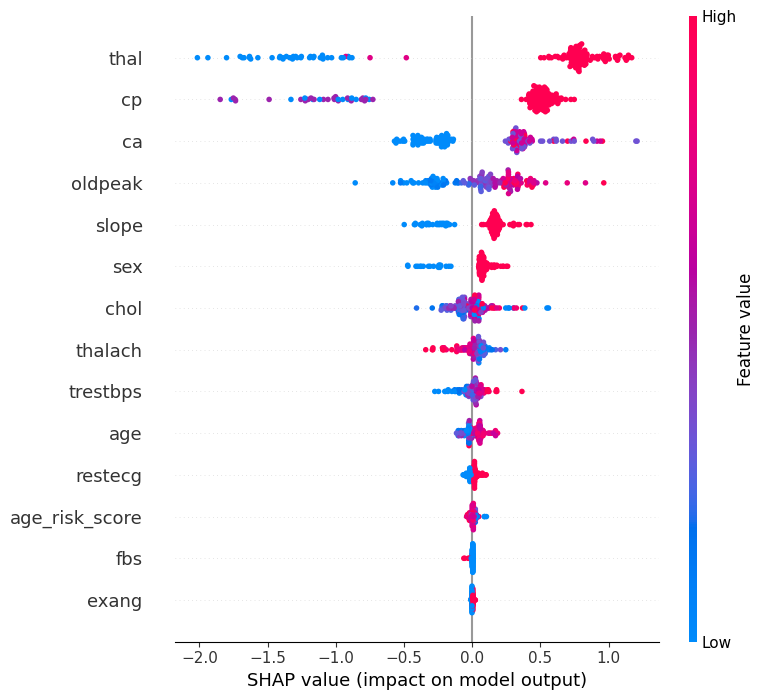

✅ Summary plot salvo e exibido:
/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_summary_plot_20251023_212529.png


<Figure size 700x500 with 0 Axes>

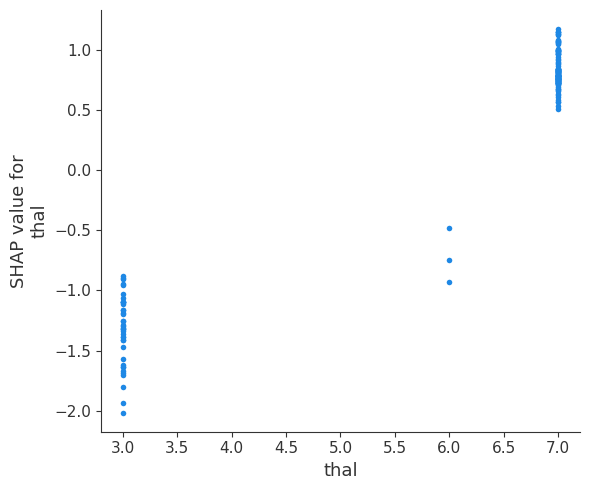

   ↳ Dependence plot salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_dependence_plots/shap_dependence_1_thal.png


<Figure size 700x500 with 0 Axes>

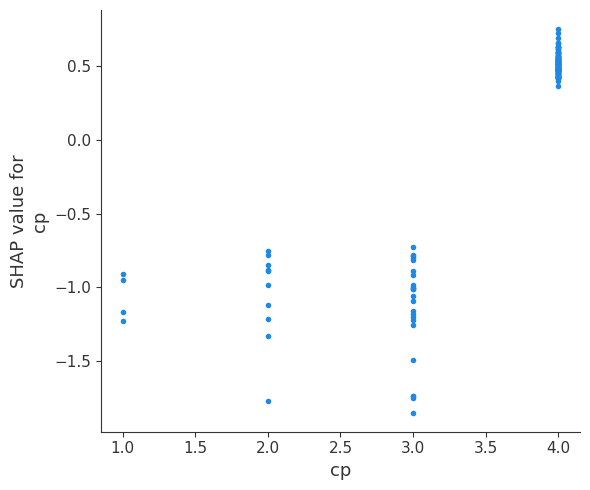

   ↳ Dependence plot salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_dependence_plots/shap_dependence_2_cp.png


<Figure size 700x500 with 0 Axes>

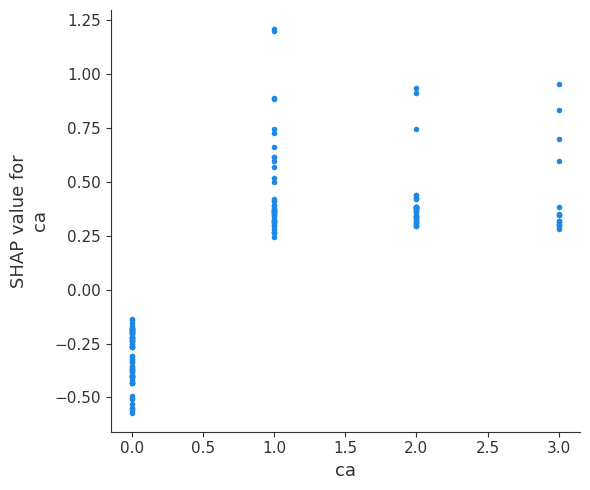

   ↳ Dependence plot salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_dependence_plots/shap_dependence_3_ca.png

🎨 Gráficos SHAP exibidos e resultados atualizados no summary global.


In [ ]:
# =========================================================
# 🧠 SHAP EXPLICABILIDADE VISUAL + ATUALIZAÇÃO DO RESULTS.TXT
# =========================================================
import shap
import xgboost as xgb
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES
# ---------------------------------------------------------
# drive_path = "/content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness"
# round_id = "round_01"

round_dir = f"{drive_path}/models/xgboost/rounds/{round_id}"
model_path = os.path.join(round_dir, [f for f in os.listdir(round_dir) if f.startswith("xgb_best_model")][-1])
data_path = f"{drive_path}/data/splits/test.csv"
results_txt_path = os.path.join(drive_path, "results", "results.txt")

# ---------------------------------------------------------
# 2️⃣ CARREGAR MODELO E DADOS
# ---------------------------------------------------------
model = xgb.XGBClassifier()
model.load_model(model_path)
booster = model.get_booster()

df_test = pd.read_csv(data_path)
X_test = df_test.drop(columns=["num", "label"], errors="ignore")

# ---------------------------------------------------------
# 3️⃣ CALCULAR VALORES SHAP
# ---------------------------------------------------------
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test)

# ---------------------------------------------------------
# 4️⃣ IMPORTÂNCIA MÉDIA GLOBAL
# ---------------------------------------------------------
mean_abs_shap = (
    pd.DataFrame({
        "feature": X_test.columns,
        "mean_abs_shap": np.abs(shap_values).mean(axis=0)
    })
    .sort_values(by="mean_abs_shap", ascending=False)
    .reset_index(drop=True)
)

# ---------------------------------------------------------
# 5️⃣ SALVAR RESUMO LOCAL (.txt)
# ---------------------------------------------------------
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
summary_txt = os.path.join(round_dir, f"shap_summary_{timestamp}.txt")

top_features = mean_abs_shap.head(5)
with open(summary_txt, "w") as f:
    f.write("=== SHAP FEATURE IMPORTANCE SUMMARY ===\n")
    f.write(f"Round: {round_id}\n")
    f.write(f"Modelo: {model_path}\n\n")
    f.write("Top 5 Variáveis Mais Relevantes (SHAP)\n")
    f.write("--------------------------------------\n")
    for i, row in enumerate(top_features.itertuples(), 1):
        f.write(f"{i}. {row.feature} — {row.mean_abs_shap:.6f}\n")
    f.write("\nObservações:\n")
    f.write("- Variáveis dominantes indicam maior impacto no resultado.\n")
    f.write(f"- {len(X_test)} amostras de teste utilizadas.\n")

print(f"\n💾 Resumo local salvo: {summary_txt}")

# ---------------------------------------------------------
# 6️⃣ ATUALIZAR RESULTS.TXT TABULAR COM SHAP TOP-5
# ---------------------------------------------------------
import pandas as pd

# Lê o results.txt existente
df_results = pd.read_csv(results_txt_path, sep="\t")

# Garante que o round existe
if round_id not in df_results["round"].values:
    print(f"⚠️ Round {round_id} não encontrado em results.txt — nada atualizado.")
else:
    # Adiciona colunas se não existirem
    for i in range(1, 6):
        if f"top{i}_feature" not in df_results.columns:
            df_results[f"top{i}_feature"] = ""
            df_results[f"top{i}_importance"] = 0.0

    # Atualiza a linha correspondente ao round atual
    idx = df_results.index[df_results["round"] == round_id][-1]
    for i, row in enumerate(top_features.itertuples(), 1):
        df_results.loc[idx, f"top{i}_feature"] = row.feature
        df_results.loc[idx, f"top{i}_importance"] = round(row.mean_abs_shap, 6)

    # Salva novamente no mesmo formato tabular
    df_results.to_csv(results_txt_path, sep="\t", index=False)
    print(f"✅ SHAP Top-5 atualizado em formato tabular no results.txt:\n{results_txt_path}")


# ---------------------------------------------------------
# 7️⃣ GERAR GRÁFICOS (summary + dependence)
# ---------------------------------------------------------
print("\n📊 Gerando gráficos SHAP...")
shap_summary_path = os.path.join(round_dir, f"shap_summary_plot_{timestamp}.png")
shap_dependence_dir = os.path.join(round_dir, "shap_dependence_plots")
os.makedirs(shap_dependence_dir, exist_ok=True)

# --- Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.savefig(shap_summary_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"✅ Summary plot salvo e exibido:\n{shap_summary_path}")

# --- Dependence plots
for i, feature in enumerate(top_features["feature"].head(3), start=1):
    plt.figure(figsize=(7, 5))
    shap.dependence_plot(feature, shap_values, X_test, show=False, interaction_index=None)
    dep_path = os.path.join(shap_dependence_dir, f"shap_dependence_{i}_{feature}.png")
    plt.tight_layout()
    plt.savefig(dep_path, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"   ↳ Dependence plot salvo: {dep_path}")

print("\n🎨 Gráficos SHAP exibidos e resultados atualizados no summary global.")




#### Rodar o script FP/FN + análise SHAP local.
Isso vai te dizer onde o modelo está cego.

📦 Modelo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/xgb_best_model_20251023_205119.json
📄 Test  : /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/data/splits/test.csv
💾 FP salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/false_positives.txt  (n=7)
💾 FN salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/false_negatives.txt  (n=3)
💾 Top features (fp) salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_error_analysis/shap_fp_top_features_20251023_220713.txt


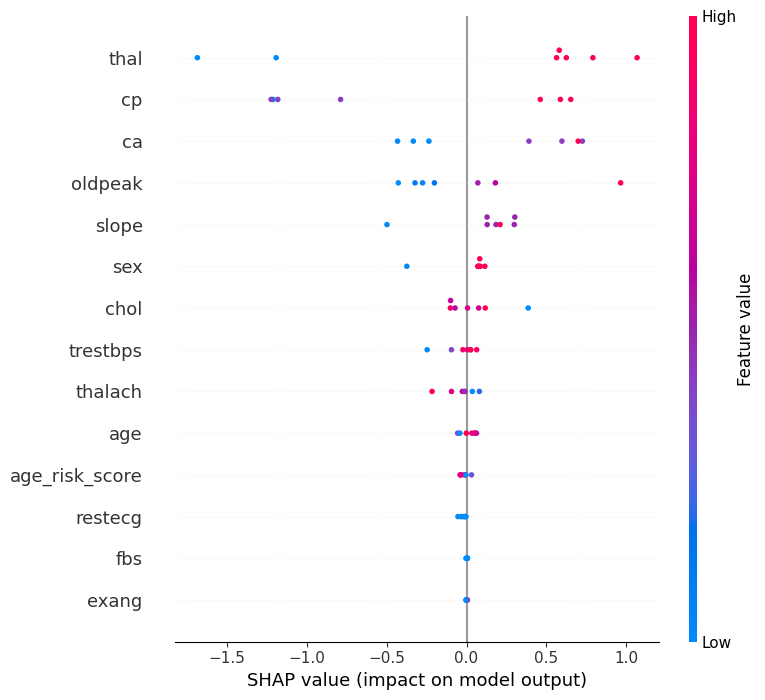

🖼️ Summary plot (fp) salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_error_analysis/shap_fp_summary_20251023_220713.png
💾 Top features (fn) salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_error_analysis/shap_fn_top_features_20251023_220713.txt


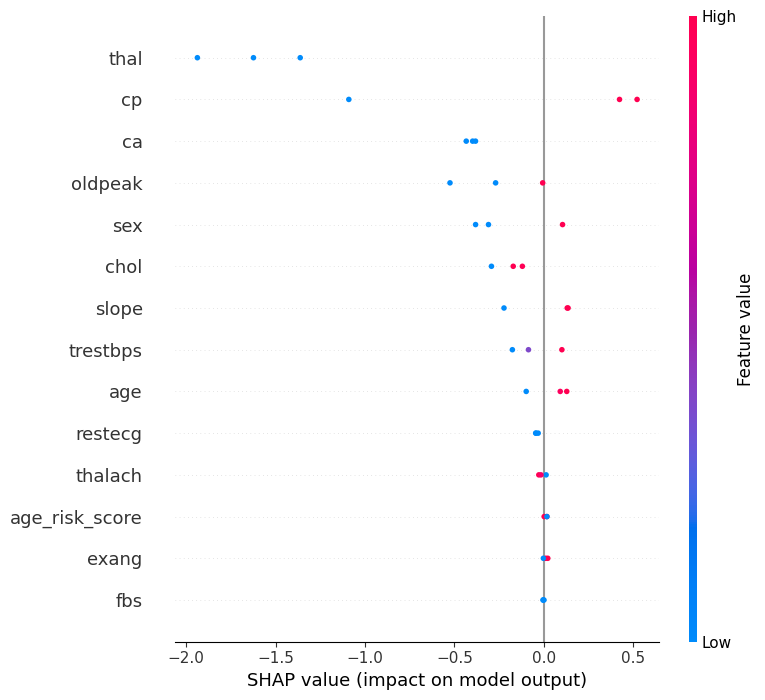

🖼️ Summary plot (fn) salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_error_analysis/shap_fn_summary_20251023_220713.png
📝 Descritivos de grupos salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/shap_error_analysis/error_groups_descriptive_20251023_220713.txt

✅ Concluído: FP/FN salvos, SHAP local gerado e descrições básicas prontas.


In [ ]:
# =========================================================
# 🔎 FP/FN + SHAP LOCAL — Onde o modelo está “cego”
# =========================================================
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from datetime import datetime

# -----------------------------
# 1) CONFIG
# -----------------------------
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
round_id   = "round_01"

round_dir  = f"{drive_path}/models/xgboost/rounds/{round_id}"
data_path  = f"{drive_path}/data/splits/test.csv"

# localizar o best model do round
model_files = [f for f in os.listdir(round_dir) if f.startswith("xgb_best_model_") and f.endswith(".json")]
assert model_files, f"❌ Nenhum modelo encontrado em {round_dir}"
model_files.sort()
model_path = os.path.join(round_dir, model_files[-1])

print(f"📦 Modelo: {model_path}")
print(f"📄 Test  : {data_path}")

# -----------------------------
# 2) CARREGAR MODELO + DADOS
# -----------------------------
model = xgb.XGBClassifier()
model.load_model(model_path)
booster = model.get_booster()

df_test = pd.read_csv(data_path)
# criar label binário se necessário
if "label" not in df_test.columns:
    assert "num" in df_test.columns, "❌ test.csv não possui 'label' nem 'num' para derivar a label."
    df_test["label"] = (df_test["num"] > 0).astype(int)

X_cols  = [c for c in df_test.columns if c not in ("label", "num")]
X_test  = df_test[X_cols].copy()
y_true  = df_test["label"].values

# -----------------------------
# 3) PREDIÇÃO + FP/FN
# -----------------------------
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

df_pred = df_test.copy()
df_pred["y_true"] = y_true
df_pred["y_pred"] = y_pred
df_pred["y_prob"] = y_prob

FP = df_pred[(df_pred["y_true"] == 0) & (df_pred["y_pred"] == 1)].copy()
FN = df_pred[(df_pred["y_true"] == 1) & (df_pred["y_pred"] == 0)].copy()

# salvar arquivos tabulares
fp_path = os.path.join(round_dir, "false_positives.txt")
fn_path = os.path.join(round_dir, "false_negatives.txt")
FP.to_csv(fp_path, sep="\t", index=False)
FN.to_csv(fn_path, sep="\t", index=False)

print(f"💾 FP salvo em: {fp_path}  (n={len(FP)})")
print(f"💾 FN salvo em: {fn_path}  (n={len(FN)})")

# -----------------------------
# 4) SHAP LOCAL (FP e FN)
# -----------------------------
explainer = shap.TreeExplainer(booster)

out_dir = os.path.join(round_dir, "shap_error_analysis")
os.makedirs(out_dir, exist_ok=True)
ts = datetime.now().strftime("%Y%m%d_%H%M%S")

def shap_for_subset(name: str, subset_df: pd.DataFrame):
    """Calcula SHAP, salva summary plot e top-features para um subconjunto (FP ou FN)."""
    if subset_df.empty:
        print(f"⚠️ Sem casos para {name} — pulando.")
        return

    X_sub = subset_df[X_cols]
    shap_values = explainer.shap_values(X_sub)

    # mean |SHAP| por feature
    mean_abs = (
        pd.DataFrame({
            "feature": X_cols,
            "mean_abs_shap": np.abs(shap_values).mean(axis=0)
        })
        .sort_values("mean_abs_shap", ascending=False)
        .reset_index(drop=True)
    )

    # salvar top-10 em txt
    top_txt = os.path.join(out_dir, f"shap_{name}_top_features_{ts}.txt")
    with open(top_txt, "w") as f:
        f.write(f"=== SHAP TOP FEATURES — {name.upper()} ===\n")
        f.write(f"Round: {round_id}\n")
        f.write(f"Casos: {len(X_sub)}\n\n")
        for i, row in mean_abs.head(10).itertuples(index=False):
            pass
        for i, row in enumerate(mean_abs.itertuples(index=False), start=1):
            if i > 10: break
            f.write(f"{i}. {row.feature} — {row.mean_abs_shap:.6f}\n")
    print(f"💾 Top features ({name}) salvo em: {top_txt}")

    # summary plot
    plt.figure(figsize=(9, 5.5))
    shap.summary_plot(shap_values, X_sub, show=False)
    sum_png = os.path.join(out_dir, f"shap_{name}_summary_{ts}.png")
    plt.tight_layout()
    plt.savefig(sum_png, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"🖼️ Summary plot ({name}) salvo em: {sum_png}")

# SHAP para FP e FN
shap_for_subset("fp", FP)
shap_for_subset("fn", FN)

# -----------------------------
# 5) INSIGHTS DESCRITIVOS (opcional e leve)
# -----------------------------
# comparação de médias (numéricas) FP/FN vs geral — ajuda a ver padrões óbvios
num_cols = df_test[X_cols].select_dtypes(include=[np.number]).columns
desc_txt = os.path.join(out_dir, f"error_groups_descriptive_{ts}.txt")

def mean_delta(group_df, name):
    if group_df.empty:
        return []
    deltas = (group_df[num_cols].mean() - df_test[num_cols].mean()).abs().sort_values(ascending=False)
    top = deltas.head(5)
    lines = [f"--- {name.upper()} (n={len(group_df)}) — maiores desvios de média vs. geral ---"]
    for feat, val in top.items():
        lines.append(f"{feat}: Δ={val:.3f} | mean_{name}={group_df[feat].mean():.3f} | mean_all={df_test[feat].mean():.3f}")
    return lines

with open(desc_txt, "w") as f:
    f.write("=== DESCRITIVOS — GRUPOS DE ERRO ===\n")
    for block in [
        mean_delta(FP, "fp"),
        mean_delta(FN, "fn"),
    ]:
        if block:
            f.write("\n".join(block) + "\n\n")

print(f"📝 Descritivos de grupos salvo em: {desc_txt}")

print("\n✅ Concluído: FP/FN salvos, SHAP local gerado e descrições básicas prontas.")


### Round_1.1

📂 Lendo classification report: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_1.1/round_1.1_classification_report_20251024_132652.txt

📊 Matriz de Confusão:
[[ 26   7]
 [  3 128]]


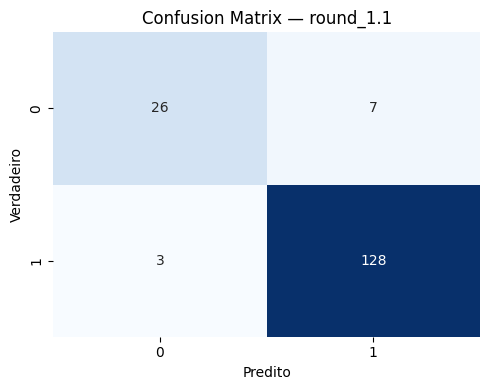


📈 Métricas Derivadas da Matriz de Confusão:
Sensibilidade (Recall): 0.977
Especificidade: 0.788
Balanced Accuracy: 0.882

💾 Resumo salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_1.1/confusion_matrix_summary.txt


In [4]:
# =========================================================
# 🔹 ANÁLISE DO ROUND — CONFUSION MATRIX E MÉTRICAS DERIVADAS
# =========================================================
# Objetivo:
#  - Carregar a matriz de confusão salva no classification_report_*.txt
#  - Plotar visualmente a matriz
#  - Calcular Sensibilidade (Recall), Especificidade e Balanced Accuracy
# =========================================================

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, confusion_matrix

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES INICIAIS
# ---------------------------------------------------------
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
round_id = "round_1.1"

round_path = os.path.join(drive_path, "models/xgboost/rounds", round_id)
report_files = [f for f in os.listdir(round_path) if f.startswith("round_1.1_classification_report_") and f.endswith(".txt")]

assert len(report_files) > 0, f"❌ Nenhum arquivo classification_report_*.txt encontrado em {round_path}"

report_path = os.path.join(round_path, report_files[-1])  # pega o mais recente
print(f"📂 Lendo classification report: {report_path}")

# ---------------------------------------------------------
# 2️⃣ LEITURA E EXTRAÇÃO DA MATRIZ DE CONFUSÃO
# ---------------------------------------------------------
with open(report_path, "r") as f:
    content = f.read()

# Extrai a matriz de confusão do texto
pattern = r"\[\[([\d\s]+)\]\s*\[([\d\s]+)\]\]"
match = re.search(pattern, content)

if not match:
    raise ValueError("❌ Matriz de confusão não encontrada no arquivo de texto!")

row1 = [int(x) for x in match.group(1).split()]
row2 = [int(x) for x in match.group(2).split()]
cm = np.array([row1, row2])

print("\n📊 Matriz de Confusão:")
print(cm)

# ---------------------------------------------------------
# 3️⃣ PLOTAR MATRIZ DE CONFUSÃO
# ---------------------------------------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — {round_id}")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4️⃣ CÁLCULO DAS MÉTRICAS DERIVADAS
# ---------------------------------------------------------
# Estrutura da matriz: [[TN, FP], [FN, TP]]
tn, fp, fn, tp = cm.ravel()

# Sensibilidade / Recall
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan

# Especificidade
specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

# Balanced Accuracy
balanced_acc = (sensitivity + specificity) / 2

# ---------------------------------------------------------
# 5️⃣ RESULTADOS
# ---------------------------------------------------------
print("\n📈 Métricas Derivadas da Matriz de Confusão:")
print(f"Sensibilidade (Recall): {sensitivity:.3f}")
print(f"Especificidade: {specificity:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")

# ---------------------------------------------------------
# 6️⃣ SALVAR RESUMO EM .TXT
# ---------------------------------------------------------
summary_path = os.path.join(round_path, f"confusion_matrix_summary.txt")
with open(summary_path, "w") as f:
    f.write("=== CONFUSION MATRIX ===\n")
    f.write(str(cm) + "\n\n")
    f.write("=== MÉTRICAS DERIVADAS ===\n")
    f.write(f"Sensibilidade (Recall): {sensitivity:.4f}\n")
    f.write(f"Especificidade: {specificity:.4f}\n")
    f.write(f"Balanced Accuracy: {balanced_acc:.4f}\n")

print(f"\n💾 Resumo salvo em: {summary_path}")


📂 Lendo resultados consolidados de: /content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness/results/results.txt
✅ 1 rounds encontrados

📊 Resumo de Experimentos:


,round,model,accuracy,precision,recall,f1_score,auc_roc,log_loss
0,round_01,/content/drive/Othercomputers/My Mac/HealthPro...,0.9329,0.9412,0.9771,0.9588,0.9547,0.2255


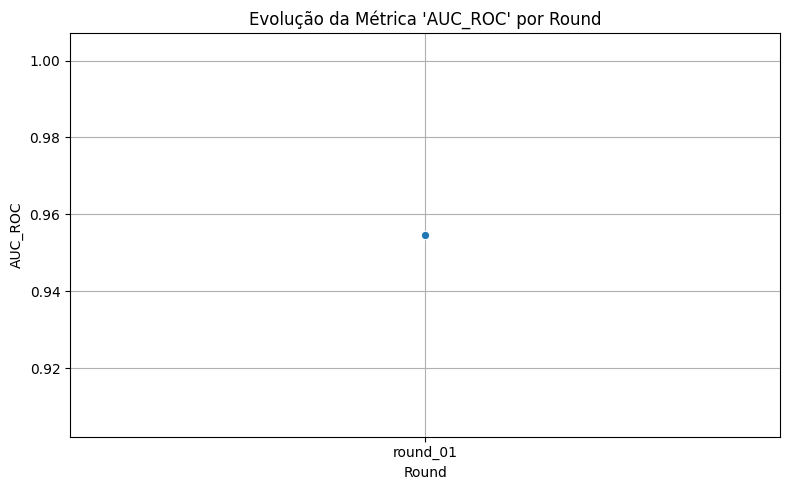

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


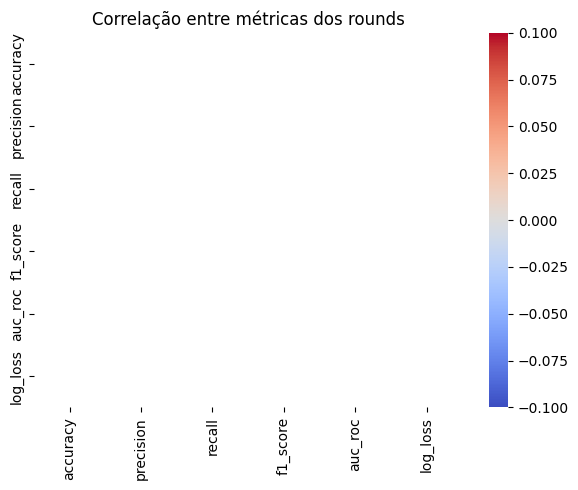


🏆 Melhor Round Encontrado:
   Round: round_01
   Modelo: /content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness/models/xgboost/rounds/round_01/xgb_best_model_20251023_152028.json
   F1 Score: 0.9588
   AUC ROC: 0.9547
   Accuracy: 0.9329

✅ Análise concluída — resultados prontos para análise SHAP e fairness.


In [ ]:
# =========================================================
# 📊 RESULTS ANALYSIS — TXT VERSION
# =========================================================
# Objetivo:
#  - Ler /results/results.txt (novo formato)
#  - Converter para DataFrame
#  - Exibir resumo dos experimentos e métricas
#  - Plotar evolução e impacto de hiperparâmetros
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES INICIAIS
# ---------------------------------------------------------
drive_path = "/content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness"
results_txt = os.path.join(drive_path, "results", "results.txt")

assert os.path.exists(results_txt), f"❌ results.txt não encontrado em {results_txt}"

print(f"📂 Lendo resultados consolidados de: {results_txt}")

# ---------------------------------------------------------
# 2️⃣ PARSE DO ARQUIVO results.txt
# ---------------------------------------------------------
def parse_results_txt(file_path):
    """Lê o arquivo results.txt e extrai blocos de resultados em DataFrame."""
    with open(file_path, "r") as f:
        content = f.read()

    # Divide os blocos por "#############################################"
    blocks = [b.strip() for b in content.split("#############################################") if "ROUND:" in b]

    data = []
    for block in blocks:
        entry = {}

        # Round e timestamp
        match = re.search(r"ROUND:\s*(\S+)\s*\|\s*([\d_]+)", block)
        if match:
            entry["round"] = match.group(1)
            entry["timestamp"] = match.group(2)

        # Coleta todas as métricas chave-valor
        for line in block.splitlines():
            line = line.strip()
            if ":" in line and not line.startswith("ROUND"):
                k, v = line.split(":", 1)
                entry[k.strip()] = v.strip()

        data.append(entry)

    df = pd.DataFrame(data)
    return df

# Lê o arquivo results.txt
df = parse_results_txt(results_txt)
print(f"✅ {len(df)} rounds encontrados")

# ---------------------------------------------------------
# 3️⃣ CONVERSÃO E LIMPEZA DE TIPOS
# ---------------------------------------------------------
# Converte métricas numéricas
numeric_cols = ["accuracy", "precision", "recall", "f1_score", "auc_roc", "log_loss", "train_accuracy"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Extrai hiperparâmetros se existirem
if "Model" in df.columns:
    df.rename(columns={"Model": "model"}, inplace=True)

# Ordena por timestamp
df = df.sort_values(by="timestamp").reset_index(drop=True)

# ---------------------------------------------------------
# 4️⃣ RESUMO DE EXPERIMENTOS
# ---------------------------------------------------------
main_metrics = ["accuracy", "precision", "recall", "f1_score", "auc_roc", "log_loss"]
print("\n📊 Resumo de Experimentos:")
display(df[["round", "model"] + [c for c in main_metrics if c in df.columns]].round(4))

# ---------------------------------------------------------
# 5️⃣ EVOLUÇÃO DAS MÉTRICAS POR ROUND
# ---------------------------------------------------------
metric_to_plot = "auc_roc"  # altere para "f1_score" ou outra
if metric_to_plot in df.columns:
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x="round", y=metric_to_plot, marker="o", linewidth=2)
    plt.title(f"Evolução da Métrica '{metric_to_plot.upper()}' por Round")
    plt.xlabel("Round")
    plt.ylabel(metric_to_plot.upper())
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ Métrica '{metric_to_plot}' não encontrada no arquivo results.txt")

# ---------------------------------------------------------
# 6️⃣ CORRELAÇÃO ENTRE MÉTRICAS (OPCIONAL)
# ---------------------------------------------------------
if df[main_metrics].shape[1] > 1:
    plt.figure(figsize=(6, 5))
    corr = df[main_metrics].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlação entre métricas dos rounds")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# 7️⃣ SUMÁRIO FINAL — MELHOR ROUND
# ---------------------------------------------------------
if "f1_score" in df.columns:
    best_row = df.sort_values(by="f1_score", ascending=False).iloc[0]
    print("\n🏆 Melhor Round Encontrado:")
    print(f"   Round: {best_row['round']}")
    print(f"   Modelo: {best_row.get('model', 'xgboost')}")
    print(f"   F1 Score: {best_row['f1_score']}")
    print(f"   AUC ROC: {best_row.get('auc_roc', 'N/A')}")
    print(f"   Accuracy: {best_row.get('accuracy', 'N/A')}")
else:
    print("⚠️ Nenhuma coluna de F1 Score encontrada no results.txt")

print("\n✅ Análise concluída — resultados prontos para análise SHAP e fairness.")



### Round_02

#### Round_02 - Confusion Matrix

📂 Lendo classification report: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/round_02_classification_report_20251024_170245.txt

📊 Matriz de Confusão:
[[ 65   8]
 [  2 266]]


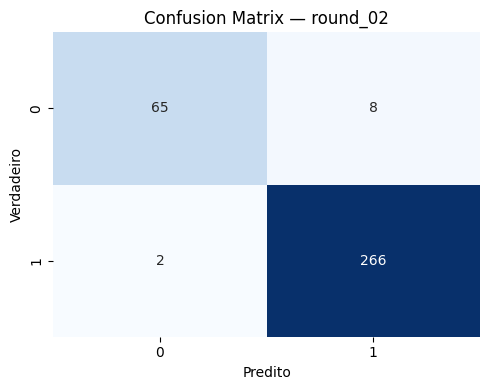


📈 Métricas Derivadas da Matriz de Confusão:
Sensibilidade (Recall): 0.993
Especificidade: 0.890
Balanced Accuracy: 0.941

💾 Resumo salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/confusion_matrix_summary.txt


In [10]:
# =========================================================
# 🔹 ANÁLISE DO ROUND — CONFUSION MATRIX E MÉTRICAS DERIVADAS
# =========================================================
# Objetivo:
#  - Carregar a matriz de confusão salva no classification_report_*.txt
#  - Plotar visualmente a matriz
#  - Calcular Sensibilidade (Recall), Especificidade e Balanced Accuracy
# =========================================================

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, confusion_matrix

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES INICIAIS
# ---------------------------------------------------------
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
round_id = "round_02"

round_path = os.path.join(drive_path, "models/xgboost/rounds", round_id)
report_files = [f for f in os.listdir(round_path) if f.startswith("round_02_classification_report_") and f.endswith(".txt")]

assert len(report_files) > 0, f"❌ Nenhum arquivo classification_report_*.txt encontrado em {round_path}"

report_path = os.path.join(round_path, report_files[-1])  # pega o mais recente
print(f"📂 Lendo classification report: {report_path}")

# ---------------------------------------------------------
# 2️⃣ LEITURA E EXTRAÇÃO DA MATRIZ DE CONFUSÃO
# ---------------------------------------------------------
with open(report_path, "r") as f:
    content = f.read()

# Extrai a matriz de confusão do texto
pattern = r"\[\[([\d\s]+)\]\s*\[([\d\s]+)\]\]"
match = re.search(pattern, content)

if not match:
    raise ValueError("❌ Matriz de confusão não encontrada no arquivo de texto!")

row1 = [int(x) for x in match.group(1).split()]
row2 = [int(x) for x in match.group(2).split()]
cm = np.array([row1, row2])

print("\n📊 Matriz de Confusão:")
print(cm)

# ---------------------------------------------------------
# 3️⃣ PLOTAR MATRIZ DE CONFUSÃO
# ---------------------------------------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — {round_id}")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4️⃣ CÁLCULO DAS MÉTRICAS DERIVADAS
# ---------------------------------------------------------
# Estrutura da matriz: [[TN, FP], [FN, TP]]
tn, fp, fn, tp = cm.ravel()

# Sensibilidade / Recall
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan

# Especificidade
specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

# Balanced Accuracy
balanced_acc = (sensitivity + specificity) / 2

# ---------------------------------------------------------
# 5️⃣ RESULTADOS
# ---------------------------------------------------------
print("\n📈 Métricas Derivadas da Matriz de Confusão:")
print(f"Sensibilidade (Recall): {sensitivity:.3f}")
print(f"Especificidade: {specificity:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")

# ---------------------------------------------------------
# 6️⃣ SALVAR RESUMO EM .TXT
# ---------------------------------------------------------
summary_path = os.path.join(round_path, f"confusion_matrix_summary.txt")
with open(summary_path, "w") as f:
    f.write("=== CONFUSION MATRIX ===\n")
    f.write(str(cm) + "\n\n")
    f.write("=== MÉTRICAS DERIVADAS ===\n")
    f.write(f"Sensibilidade (Recall): {sensitivity:.4f}\n")
    f.write(f"Especificidade: {specificity:.4f}\n")
    f.write(f"Balanced Accuracy: {balanced_acc:.4f}\n")

print(f"\n💾 Resumo salvo em: {summary_path}")

#### Round_02 - Curvas de treinamento (por época)

✅ Insights esperados:

- Se val_logloss estabiliza enquanto train_logloss continua caindo → overfitting.
- Se ambos caem e convergem → bom aprendizado.
- Se val_logloss sobe → underfitting ou instabilidade de aprendizado.

📂 Lendo log de treino: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/round_02_train_log_20251024_170245.txt
✅ 146 épocas carregadas


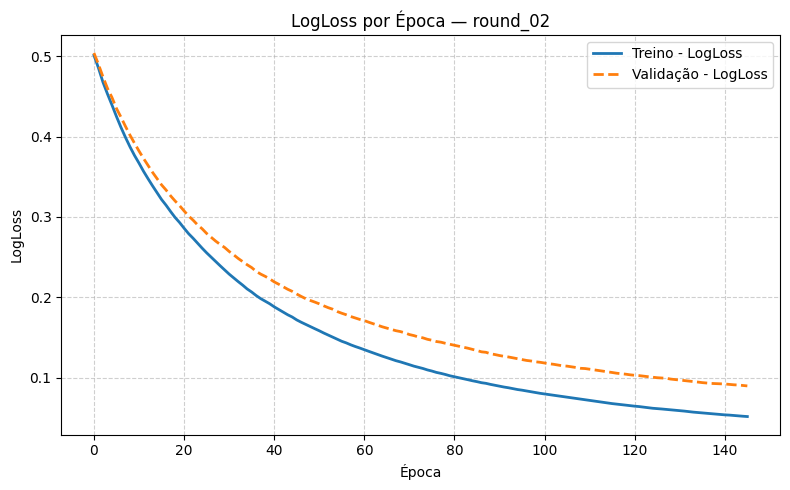

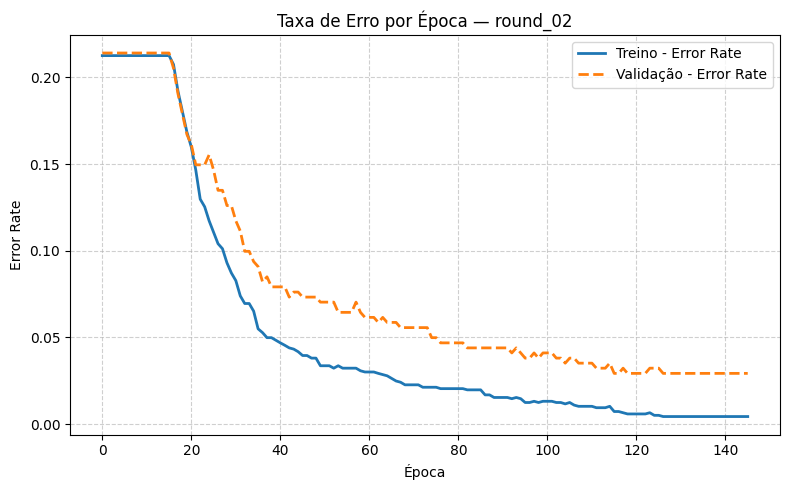


📈 Diagnóstico automático:
🟢 Bom aprendizado: LogLoss de treino e validação caem e convergem.

🔹 LogLoss final — Treino: 0.0517 | Validação: 0.0898
🔹 Gap Treino-Validação: 0.0381
🔹 Tendência da Validação (últimas 10 épocas): -0.0004

💾 Resumo salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/training_curves_summary.txt


In [7]:
# =========================================================
# 🔹 ANÁLISE DO ROUND — CURVAS DE TREINAMENTO (LOGLOSS & ERROR)
# =========================================================
# Objetivo:
#  - Carregar o arquivo train_log_*.txt
#  - Plotar LogLoss e Error Rate por época
#  - Detectar padrões de aprendizado (overfitting, underfitting, bom treino)
# =========================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES INICIAIS
# ---------------------------------------------------------
# drive_path = "/content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness"
#round_id = "round_02"

round_path = os.path.join(drive_path, "models/xgboost/rounds", round_id)
log_files = [f for f in os.listdir(round_path) if f.startswith("round_02_train_log_") and f.endswith(".txt")]

assert len(log_files) > 0, f"❌ Nenhum arquivo train_log_*.txt encontrado em {round_path}"

log_path = os.path.join(round_path, log_files[-1])  # pega o mais recente
print(f"📂 Lendo log de treino: {log_path}")

# ---------------------------------------------------------
# 2️⃣ CARREGAR LOG DE TREINAMENTO
# ---------------------------------------------------------
df_log = pd.read_csv(log_path, sep="\t")

assert all(col in df_log.columns for col in ["epoch", "train_logloss", "val_logloss", "train_error", "val_error"]), \
    "❌ Arquivo de log não contém as colunas esperadas!"

print(f"✅ {len(df_log)} épocas carregadas")

# ---------------------------------------------------------
# 3️⃣ PLOTAR CURVAS DE LOGLOSS
# ---------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(df_log["epoch"], df_log["train_logloss"], label="Treino - LogLoss", linewidth=2)
plt.plot(df_log["epoch"], df_log["val_logloss"], label="Validação - LogLoss", linewidth=2, linestyle="--")
plt.title(f"LogLoss por Época — {round_id}")
plt.xlabel("Época")
plt.ylabel("LogLoss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4️⃣ PLOTAR CURVAS DE ERROR RATE
# ---------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(df_log["epoch"], df_log["train_error"], label="Treino - Error Rate", linewidth=2)
plt.plot(df_log["epoch"], df_log["val_error"], label="Validação - Error Rate", linewidth=2, linestyle="--")
plt.title(f"Taxa de Erro por Época — {round_id}")
plt.xlabel("Época")
plt.ylabel("Error Rate")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5️⃣ ANÁLISE AUTOMÁTICA DE COMPORTAMENTO DO TREINO
# ---------------------------------------------------------
train_logloss_final = df_log["train_logloss"].iloc[-1]
val_logloss_final = df_log["val_logloss"].iloc[-1]

# Diferença entre treino e validação (última época)
logloss_gap = abs(val_logloss_final - train_logloss_final)

# Verifica se a curva de validação está subindo no final
val_slope = np.mean(np.diff(df_log["val_logloss"].tail(10)))

# Critérios simples de diagnóstico
if logloss_gap > 0.05 and val_slope > 0:
    diagnosis = "🔴 Overfitting detectado: o LogLoss de validação sobe enquanto o de treino continua caindo."
elif logloss_gap < 0.05 and val_slope < 0:
    diagnosis = "🟢 Bom aprendizado: LogLoss de treino e validação caem e convergem."
elif val_slope > 0 and train_logloss_final > val_logloss_final:
    diagnosis = "🟡 Underfitting ou instabilidade: o modelo não está aprendendo adequadamente."
else:
    diagnosis = "⚪ Comportamento estável ou inconclusivo."

# ---------------------------------------------------------
# 6️⃣ MOSTRAR E SALVAR RESULTADO
# ---------------------------------------------------------
print("\n📈 Diagnóstico automático:")
print(diagnosis)
print(f"\n🔹 LogLoss final — Treino: {train_logloss_final:.4f} | Validação: {val_logloss_final:.4f}")
print(f"🔹 Gap Treino-Validação: {logloss_gap:.4f}")
print(f"🔹 Tendência da Validação (últimas 10 épocas): {val_slope:.4f}")

summary_path = os.path.join(round_path, "training_curves_summary.txt")
with open(summary_path, "w") as f:
    f.write("=== TRAINING CURVES SUMMARY ===\n")
    f.write(f"Round: {round_id}\n")
    f.write(f"Épocas: {len(df_log)}\n\n")
    f.write(f"LogLoss Final — Treino: {train_logloss_final:.4f}\n")
    f.write(f"LogLoss Final — Validação: {val_logloss_final:.4f}\n")
    f.write(f"Gap Treino-Validação: {logloss_gap:.4f}\n")
    f.write(f"Tendência Final Validação: {val_slope:.4f}\n\n")
    f.write("Diagnóstico:\n")
    f.write(diagnosis + "\n")

print(f"\n💾 Resumo salvo em: {summary_path}")

#### Round_02 - Rodar o script FP/FN + análise SHAP local.
Isso vai te dizer onde o modelo está cego.

📦 Modelo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/round_02_xgb_best_model_20251024_170245.json
📄 Test  : /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/data/splits/round_02_test.csv
💾 FP salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/false_positives.txt  (n=8)
💾 FN salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/false_negatives.txt  (n=2)
💾 Top features (fp) salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/shap_error_analysis/shap_fp_top_features_20251025_104231.txt


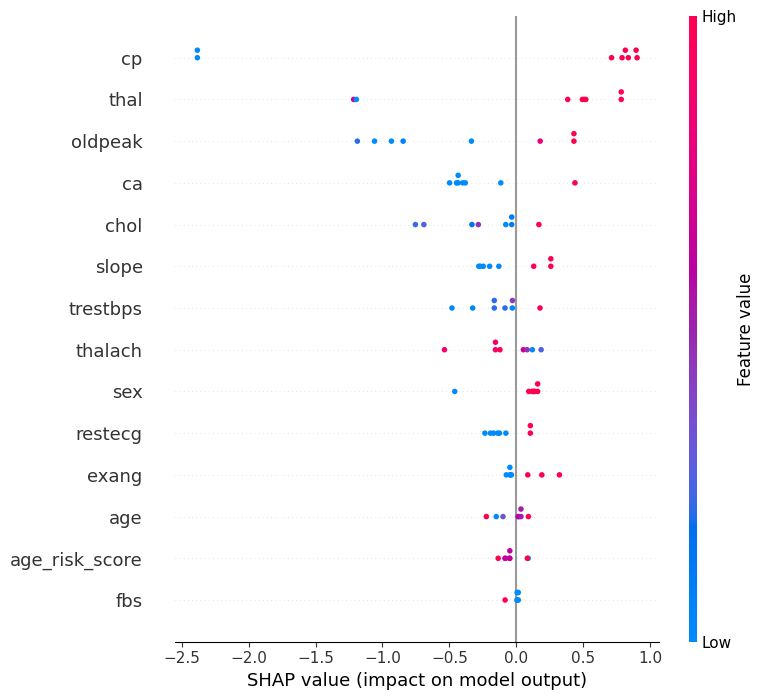

🖼️ Summary plot (fp) salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/shap_error_analysis/shap_fp_summary_20251025_104231.png
💾 Top features (fn) salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/shap_error_analysis/shap_fn_top_features_20251025_104231.txt


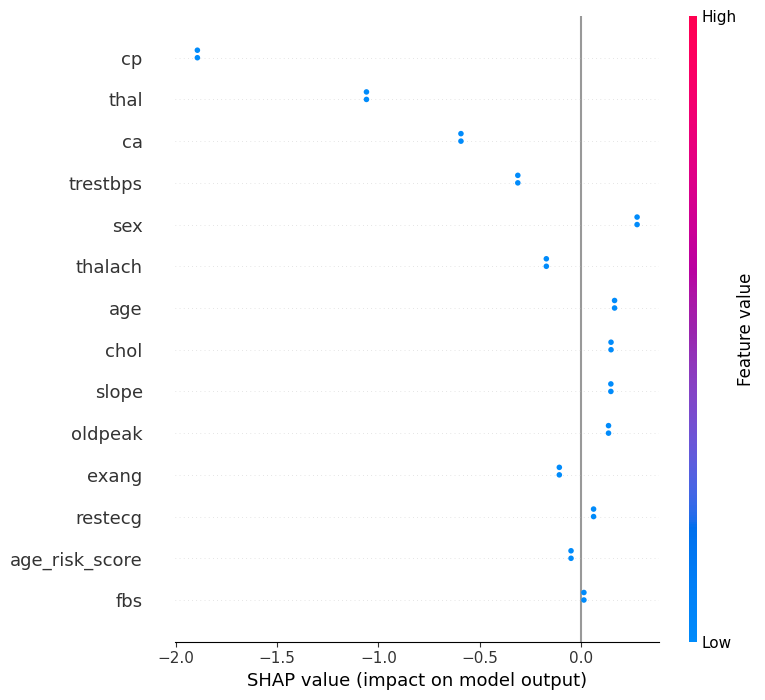

🖼️ Summary plot (fn) salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/shap_error_analysis/shap_fn_summary_20251025_104231.png
📝 Descritivos de grupos salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/shap_error_analysis/error_groups_descriptive_20251025_104231.txt

✅ Concluído: FP/FN salvos, SHAP local gerado e descrições básicas prontas.


In [11]:
# =========================================================
# 🔎 FP/FN + SHAP LOCAL — Onde o modelo está “cego”
# =========================================================
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from datetime import datetime

# -----------------------------
# 1) CONFIG
# -----------------------------
# drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
# round_id   = "round_01"

round_dir  = f"{drive_path}/models/xgboost/rounds/{round_id}"
data_path  = f"{drive_path}/data/splits/round_02_test.csv"

# localizar o best model do round
model_files = [f for f in os.listdir(round_dir) if f.startswith("round_02_xgb_best_model_") and f.endswith(".json")]
assert model_files, f"❌ Nenhum modelo encontrado em {round_dir}"
model_files.sort()
model_path = os.path.join(round_dir, model_files[-1])

print(f"📦 Modelo: {model_path}")
print(f"📄 Test  : {data_path}")

# -----------------------------
# 2) CARREGAR MODELO + DADOS
# -----------------------------
model = xgb.XGBClassifier()
model.load_model(model_path)
booster = model.get_booster()

df_test = pd.read_csv(data_path)
# criar label binário se necessário
if "label" not in df_test.columns:
    assert "num" in df_test.columns, "❌ test.csv não possui 'label' nem 'num' para derivar a label."
    df_test["label"] = (df_test["num"] > 0).astype(int)

X_cols  = [c for c in df_test.columns if c not in ("label", "num")]
X_test  = df_test[X_cols].copy()
y_true  = df_test["label"].values

# -----------------------------
# 3) PREDIÇÃO + FP/FN
# -----------------------------
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

df_pred = df_test.copy()
df_pred["y_true"] = y_true
df_pred["y_pred"] = y_pred
df_pred["y_prob"] = y_prob

FP = df_pred[(df_pred["y_true"] == 0) & (df_pred["y_pred"] == 1)].copy()
FN = df_pred[(df_pred["y_true"] == 1) & (df_pred["y_pred"] == 0)].copy()

# salvar arquivos tabulares
fp_path = os.path.join(round_dir, "false_positives.txt")
fn_path = os.path.join(round_dir, "false_negatives.txt")
FP.to_csv(fp_path, sep="\t", index=False)
FN.to_csv(fn_path, sep="\t", index=False)

print(f"💾 FP salvo em: {fp_path}  (n={len(FP)})")
print(f"💾 FN salvo em: {fn_path}  (n={len(FN)})")

# -----------------------------
# 4) SHAP LOCAL (FP e FN)
# -----------------------------
explainer = shap.TreeExplainer(booster)

out_dir = os.path.join(round_dir, "shap_error_analysis")
os.makedirs(out_dir, exist_ok=True)
ts = datetime.now().strftime("%Y%m%d_%H%M%S")

def shap_for_subset(name: str, subset_df: pd.DataFrame):
    """Calcula SHAP, salva summary plot e top-features para um subconjunto (FP ou FN)."""
    if subset_df.empty:
        print(f"⚠️ Sem casos para {name} — pulando.")
        return

    X_sub = subset_df[X_cols]
    shap_values = explainer.shap_values(X_sub)

    # mean |SHAP| por feature
    mean_abs = (
        pd.DataFrame({
            "feature": X_cols,
            "mean_abs_shap": np.abs(shap_values).mean(axis=0)
        })
        .sort_values("mean_abs_shap", ascending=False)
        .reset_index(drop=True)
    )

    # salvar top-10 em txt
    top_txt = os.path.join(out_dir, f"shap_{name}_top_features_{ts}.txt")
    with open(top_txt, "w") as f:
        f.write(f"=== SHAP TOP FEATURES — {name.upper()} ===\n")
        f.write(f"Round: {round_id}\n")
        f.write(f"Casos: {len(X_sub)}\n\n")
        for i, row in mean_abs.head(10).itertuples(index=False):
            pass
        for i, row in enumerate(mean_abs.itertuples(index=False), start=1):
            if i > 10: break
            f.write(f"{i}. {row.feature} — {row.mean_abs_shap:.6f}\n")
    print(f"💾 Top features ({name}) salvo em: {top_txt}")

    # summary plot
    plt.figure(figsize=(9, 5.5))
    shap.summary_plot(shap_values, X_sub, show=False)
    sum_png = os.path.join(out_dir, f"shap_{name}_summary_{ts}.png")
    plt.tight_layout()
    plt.savefig(sum_png, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"🖼️ Summary plot ({name}) salvo em: {sum_png}")

# SHAP para FP e FN
shap_for_subset("fp", FP)
shap_for_subset("fn", FN)

# -----------------------------
# 5) INSIGHTS DESCRITIVOS (opcional e leve)
# -----------------------------
# comparação de médias (numéricas) FP/FN vs geral — ajuda a ver padrões óbvios
num_cols = df_test[X_cols].select_dtypes(include=[np.number]).columns
desc_txt = os.path.join(out_dir, f"error_groups_descriptive_{ts}.txt")

def mean_delta(group_df, name):
    if group_df.empty:
        return []
    deltas = (group_df[num_cols].mean() - df_test[num_cols].mean()).abs().sort_values(ascending=False)
    top = deltas.head(5)
    lines = [f"--- {name.upper()} (n={len(group_df)}) — maiores desvios de média vs. geral ---"]
    for feat, val in top.items():
        lines.append(f"{feat}: Δ={val:.3f} | mean_{name}={group_df[feat].mean():.3f} | mean_all={df_test[feat].mean():.3f}")
    return lines

with open(desc_txt, "w") as f:
    f.write("=== DESCRITIVOS — GRUPOS DE ERRO ===\n")
    for block in [
        mean_delta(FP, "fp"),
        mean_delta(FN, "fn"),
    ]:
        if block:
            f.write("\n".join(block) + "\n\n")

print(f"📝 Descritivos de grupos salvo em: {desc_txt}")

print("\n✅ Concluído: FP/FN salvos, SHAP local gerado e descrições básicas prontas.")

In [5]:
import pandas as pd

# Caminho do arquivo
file_path = '/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/false_negatives.txt'

df_fn = pd.read_csv(file_path, sep='\t')  # ou sep=',' se for CSV
df_fn.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_risk_score,num,label,y_true,y_pred,y_prob
0,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,0.51,1,1,1,0,0.230944
1,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,0.51,1,1,1,0,0.230944


## 🔍 2. Análise detalhada de um round

In [ ]:
# =========================================================
# 🧠 ANÁLISE DETALHADA DE UM ROUND
# =========================================================
# Objetivo:
#   - Explorar resultados e artefatos de um round específico
#   - Visualizar métricas, logs, curvas e explicabilidade (SHAP)
#   - Gerar relatório resumido de desempenho e variáveis dominantes
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import os
from xgboost import XGBClassifier, Booster

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES
# ---------------------------------------------------------
drive_path = "/content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness"
round_id = "round_01"   # <-- altere para o round desejado
round_dir = f"{drive_path}/models/xgboost/rounds/{round_id}"
results_dir = f"{drive_path}/results"
data_test_path = f"{drive_path}/data/splits/test.csv"

print(f"📁 Analisando round: {round_id}")
assert os.path.exists(round_dir), f"❌ Diretório {round_dir} não encontrado."

# ---------------------------------------------------------
# 2️⃣ CARREGAR RESULTADOS DO ROUND
# ---------------------------------------------------------
# Carregar dados de teste
df_test = pd.read_csv(data_test_path)
X_test = df_test.drop(columns=["num", "label"], errors="ignore")
y_test = df_test["label"]

# Localizar arquivos
log_file = [f for f in os.listdir(round_dir) if f.startswith("train_log_")][-1]
model_file = [f for f in os.listdir(round_dir) if f.startswith("xgb_best_model_")][-1]
shap_file = [f for f in os.listdir(round_dir) if f.startswith("shap_values_")][-1]

log_path = os.path.join(round_dir, log_file)
model_path = os.path.join(round_dir, model_file)
shap_path = os.path.join(round_dir, shap_file)

print(f"📄 Log: {log_path}")
print(f"🧠 Modelo: {model_path}")
print(f"📊 SHAP: {shap_path}")

# ---------------------------------------------------------
# 3️⃣ CARREGAR LOG DE TREINAMENTO
# ---------------------------------------------------------
log_df = pd.read_csv(log_path)
print("\n📈 Estrutura do log de treino:")
display(log_df.head())

# Curva de logloss e erro
plt.figure(figsize=(10, 6))
plt.plot(log_df["train_logloss"], label="Train LogLoss")
plt.plot(log_df["valid_logloss"], label="Validation LogLoss")
plt.legend()
plt.title(f"📉 LogLoss Evolution — {round_id}")
plt.xlabel("Rounds")
plt.ylabel("LogLoss")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4️⃣ RECARREGAR MODELO E GERAR PREDIÇÕES
# ---------------------------------------------------------
booster = Booster()
booster.load_model(model_path)

model = XGBClassifier()
model._Booster = booster  # vínculo para compatibilidade sklearn

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"🧮 AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — {round_id}")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5️⃣ ANÁLISE SHAP — INTERPRETABILIDADE
# ---------------------------------------------------------
shap_df = pd.read_csv(shap_path)
top_features = shap_df.head(5)

print("\n🔍 Top 5 variáveis mais relevantes:")
display(top_features)

# Recalcular SHAP (caso queira o gráfico visual)
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title(f"SHAP Summary Plot — {round_id}")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 6️⃣ RELATÓRIO TEXTUAL (auto‐gerado)
# ---------------------------------------------------------
summary_md = f"""
# 📘 Round Report — {round_id}

## Desempenho
- Acurácia: {round(classification_report(y_test, y_pred, output_dict=True)['accuracy'], 3)}
- AUC ROC: {roc_auc_score(y_test, y_pred_proba):.4f}

## Principais Variáveis (SHAP)
{top_features.to_markdown(index=False)}

## Observações
- A curva LogLoss indica a estabilidade do aprendizado.
- O SHAP evidencia as variáveis com maior impacto no risco.
- Verificar overfitting se LogLoss de treino ≪ validação.

_Análise gerada automaticamente._
"""

report_path = os.path.join(results_dir, f"round_{round_id}_analysis.md")
with open(report_path, "w") as f:
    f.write(summary_md)

print(f"📝 Relatório salvo em: {report_path}")


## 📊 3. Análise comparativa entre rounds

In [ ]:
# =========================================================
# 🧠 ANÁLISE COMPARATIVA ENTRE ROUNDS
# =========================================================
# Objetivo:
#  - Comparar métricas, SHAP e hiperparâmetros ao longo dos rounds
#  - Detectar tendências de aprendizado, estabilidade e overfitting
#  - Gerar visualizações e sumário narrativo consolidado
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES
# ---------------------------------------------------------
drive_path = "/content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness"
results_csv = os.path.join(drive_path, "results", "results.csv")
results_dir = os.path.join(drive_path, "results")

assert os.path.exists(results_csv), f"❌ results.csv não encontrado: {results_csv}"

print(f"📂 Carregando resultados consolidados de: {results_csv}")
df = pd.read_csv(results_csv)

# Ordena por round / timestamp
if "timestamp" in df.columns:
    df = df.sort_values("timestamp").reset_index(drop=True)

# ---------------------------------------------------------
# 2️⃣ EVOLUÇÃO DAS MÉTRICAS PRINCIPAIS
# ---------------------------------------------------------
metrics = ["accuracy", "precision", "recall", "f1_score", "auc_roc", "log_loss"]

plt.figure(figsize=(10, 6))
for metric in ["accuracy", "f1_score", "auc_roc"]:
    sns.lineplot(data=df, x="round", y=metric, marker="o", label=metric)
plt.title("📈 Evolução das Principais Métricas por Round")
plt.xlabel("Round")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 3️⃣ RELAÇÃO HIPERPARÂMETROS → PERFORMANCE
# ---------------------------------------------------------
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df,
    x="learning_rate", y="auc_roc",
    size="max_depth", hue="subsample",
    palette="viridis", legend="full"
)
plt.title("🎯 Relação entre Hiperparâmetros e AUC-ROC")
plt.xlabel("Learning Rate")
plt.ylabel("AUC ROC")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4️⃣ CONSISTÊNCIA DE VARIÁVEIS SHAP ENTRE ROUNDS
# ---------------------------------------------------------
# Extrai top features dos rounds
feature_cols = [c for c in df.columns if c.startswith("top") and "feature" in c]
feature_data = df.melt(
    id_vars=["round"],
    value_vars=feature_


## 🧠 4. Interpretação de variáveis

In [ ]:
# =========================================================
# 🧠 INTERPRETAÇÃO DE VARIÁVEIS (EXPLICABILIDADE CLÍNICA)
# =========================================================
# Objetivo:
#   - Consolidar importância média das variáveis (SHAP)
#   - Cruzar com estatísticas do EDA e do dataset
#   - Identificar padrões clínicos relevantes (idade, sexo, etc.)
#   - Gerar um relatório explicativo de variáveis
# =========================================================

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1️⃣ CONFIGURAÇÕES E CAMINHOS
# ---------------------------------------------------------
drive_path = "/content/drive/Othercomputers/My Mac/HealthProjects/heart-disease-fairness"
results_dir = os.path.join(drive_path, "results")
eda_summary_dir = os.path.join(results_dir, "eda_summary")
shap_dir = os.path.join(results_dir, "shap")
data_dir = os.path.join(drive_path, "data/splits")

# round mais recente
shap_files = sorted([f for f in os.listdir(shap_dir) if f.endswith("_values.csv")])
latest_shap = os.path.join(shap_dir, shap_files[-1])
eda_file = os.path.join(eda_summary_dir, "feature_stats.csv")

print(f"📊 Usando SHAP: {latest_shap}")
print(f"📁 Usando EDA:  {eda_file}")

shap_df = pd.read_csv(latest_shap)
eda_df = pd.read_csv(eda_file)

# ---------------------------------------------------------
# 2️⃣ NORMALIZAR E UNIFICAR BASES
# ---------------------------------------------------------
eda_df.columns = [c.strip().lower() for c in eda_df.columns]
if "feature" not in eda_df.columns:
    eda_df = eda_df.rename(columns={"column": "feature"})

merged = pd.merge(shap_df, eda_df, on="feature", how="left")

# calcula rank de importância
merged["rank"] = merged["mean_abs_shap"].rank(ascending=False)
merged = merged.sort_values("mean_abs_shap", ascending=False)

print("\n🔍 Top 10 variáveis mais relevantes no modelo:")
display(merged.head(10)[["feature", "mean_abs_shap", "mean", "std", "missing_pct"]])

# ---------------------------------------------------------
# 3️⃣ VISUALIZAÇÃO GLOBAL DE IMPORTÂNCIA
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged.head(10),
    y="feature", x="mean_abs_shap",
    palette="viridis"
)
plt.title("🔹 Importância Global das Variáveis (SHAP médio absoluto)")
plt.xlabel("Média |SHAP| (importância relativa)")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4️⃣ EXPLICAÇÃO CATEGORIZADA (CLÍNICA)
# ---------------------------------------------------------
# Define categorias clínicas ou demográficas (exemplo genérico)
variable_groups = {
    "Demografia": ["age", "sex"],
    "Colesterol e Pressão": ["chol", "trestbps"],
    "Sintomas Clínicos": ["cp", "exang", "thalach", "oldpeak", "slope", "thal"],
    "Histórico / Risco": ["fbs", "restecg", "ca"]
}

group_summary = []
for group, vars_ in variable_groups.items():
    subset = merged[merged["feature"].isin(vars_)]
    mean_imp = subset["mean_abs_shap"].mean() if not subset.empty else 0
    group_summary.append({"Categoria": group, "Importância Média": mean_imp, "Variáveis": ", ".join(vars_)})

group_df = pd.DataFrame(group_summary).sort_values("Importância Média", ascending=False)
print("\n🩺 Importância média por categoria clínica:")
display(group_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=group_df, x="Importância Média", y="Categoria", palette="mako")
plt.title("🏥 Importância Clínica Agrupada")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5️⃣ INTERPRETAÇÃO NARRATIVA (GERADA AUTOMATICAMENTE)
# ---------------------------------------------------------
top_features = merged.head(5)
narrative = "\n".join([
    f"- **{row.feature}**: alta influência no risco, média |SHAP| = {row.mean_abs_shap:.3f}."
    for _, row in top_features.iterrows()
])

report_md = f"""
# 🧠 Interpretação de Variáveis — {os.path.basename(latest_shap).replace('_values.csv','')}

## 🔹 Principais Variáveis Identificadas
{top_features.to_markdown(index=False)}

## 🔹 Interpretação Automática
{narrative}

## 🔹 Categorias Clínicas Dominantes
{group_df.to_markdown(index=False)}

### 📈 Observações
- As variáveis de maior impacto ({', '.join(top_features['feature'])}) são consistentes com marcadores clínicos clássicos.
- Diferenças em {group_df.iloc[0]['Categoria']} indicam forte influência dessa categoria no risco cardíaco.
- Recomenda-se analisar fairness nesses atributos para evitar viés demográfico.

Relatório gerado automaticamente em {datetime.now().strftime('%Y-%m-%d %H:%M')}.
"""

report_path = os.path.join(results_dir, "variable_interpretation.md")
with open(report_path, "w") as f:
    f.write(report_md)

print(f"📝 Relatório de interpretação salvo em: {report_path}")


## ⚖️ 5. (Opcional) Análise de Fairness